In [2]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import asPolygon


In [3]:
def turn_time_to_cor(resolution, hour,minute):
    return resolution * hour + int(minute * resolution/60)
def judge_point(poly, px,py):
    return poly.contains(Point(px,py))

D:\software\anaconda\envs\ABTSim\lib\site-packages\IPython\core\interactiveshell.py:3378: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


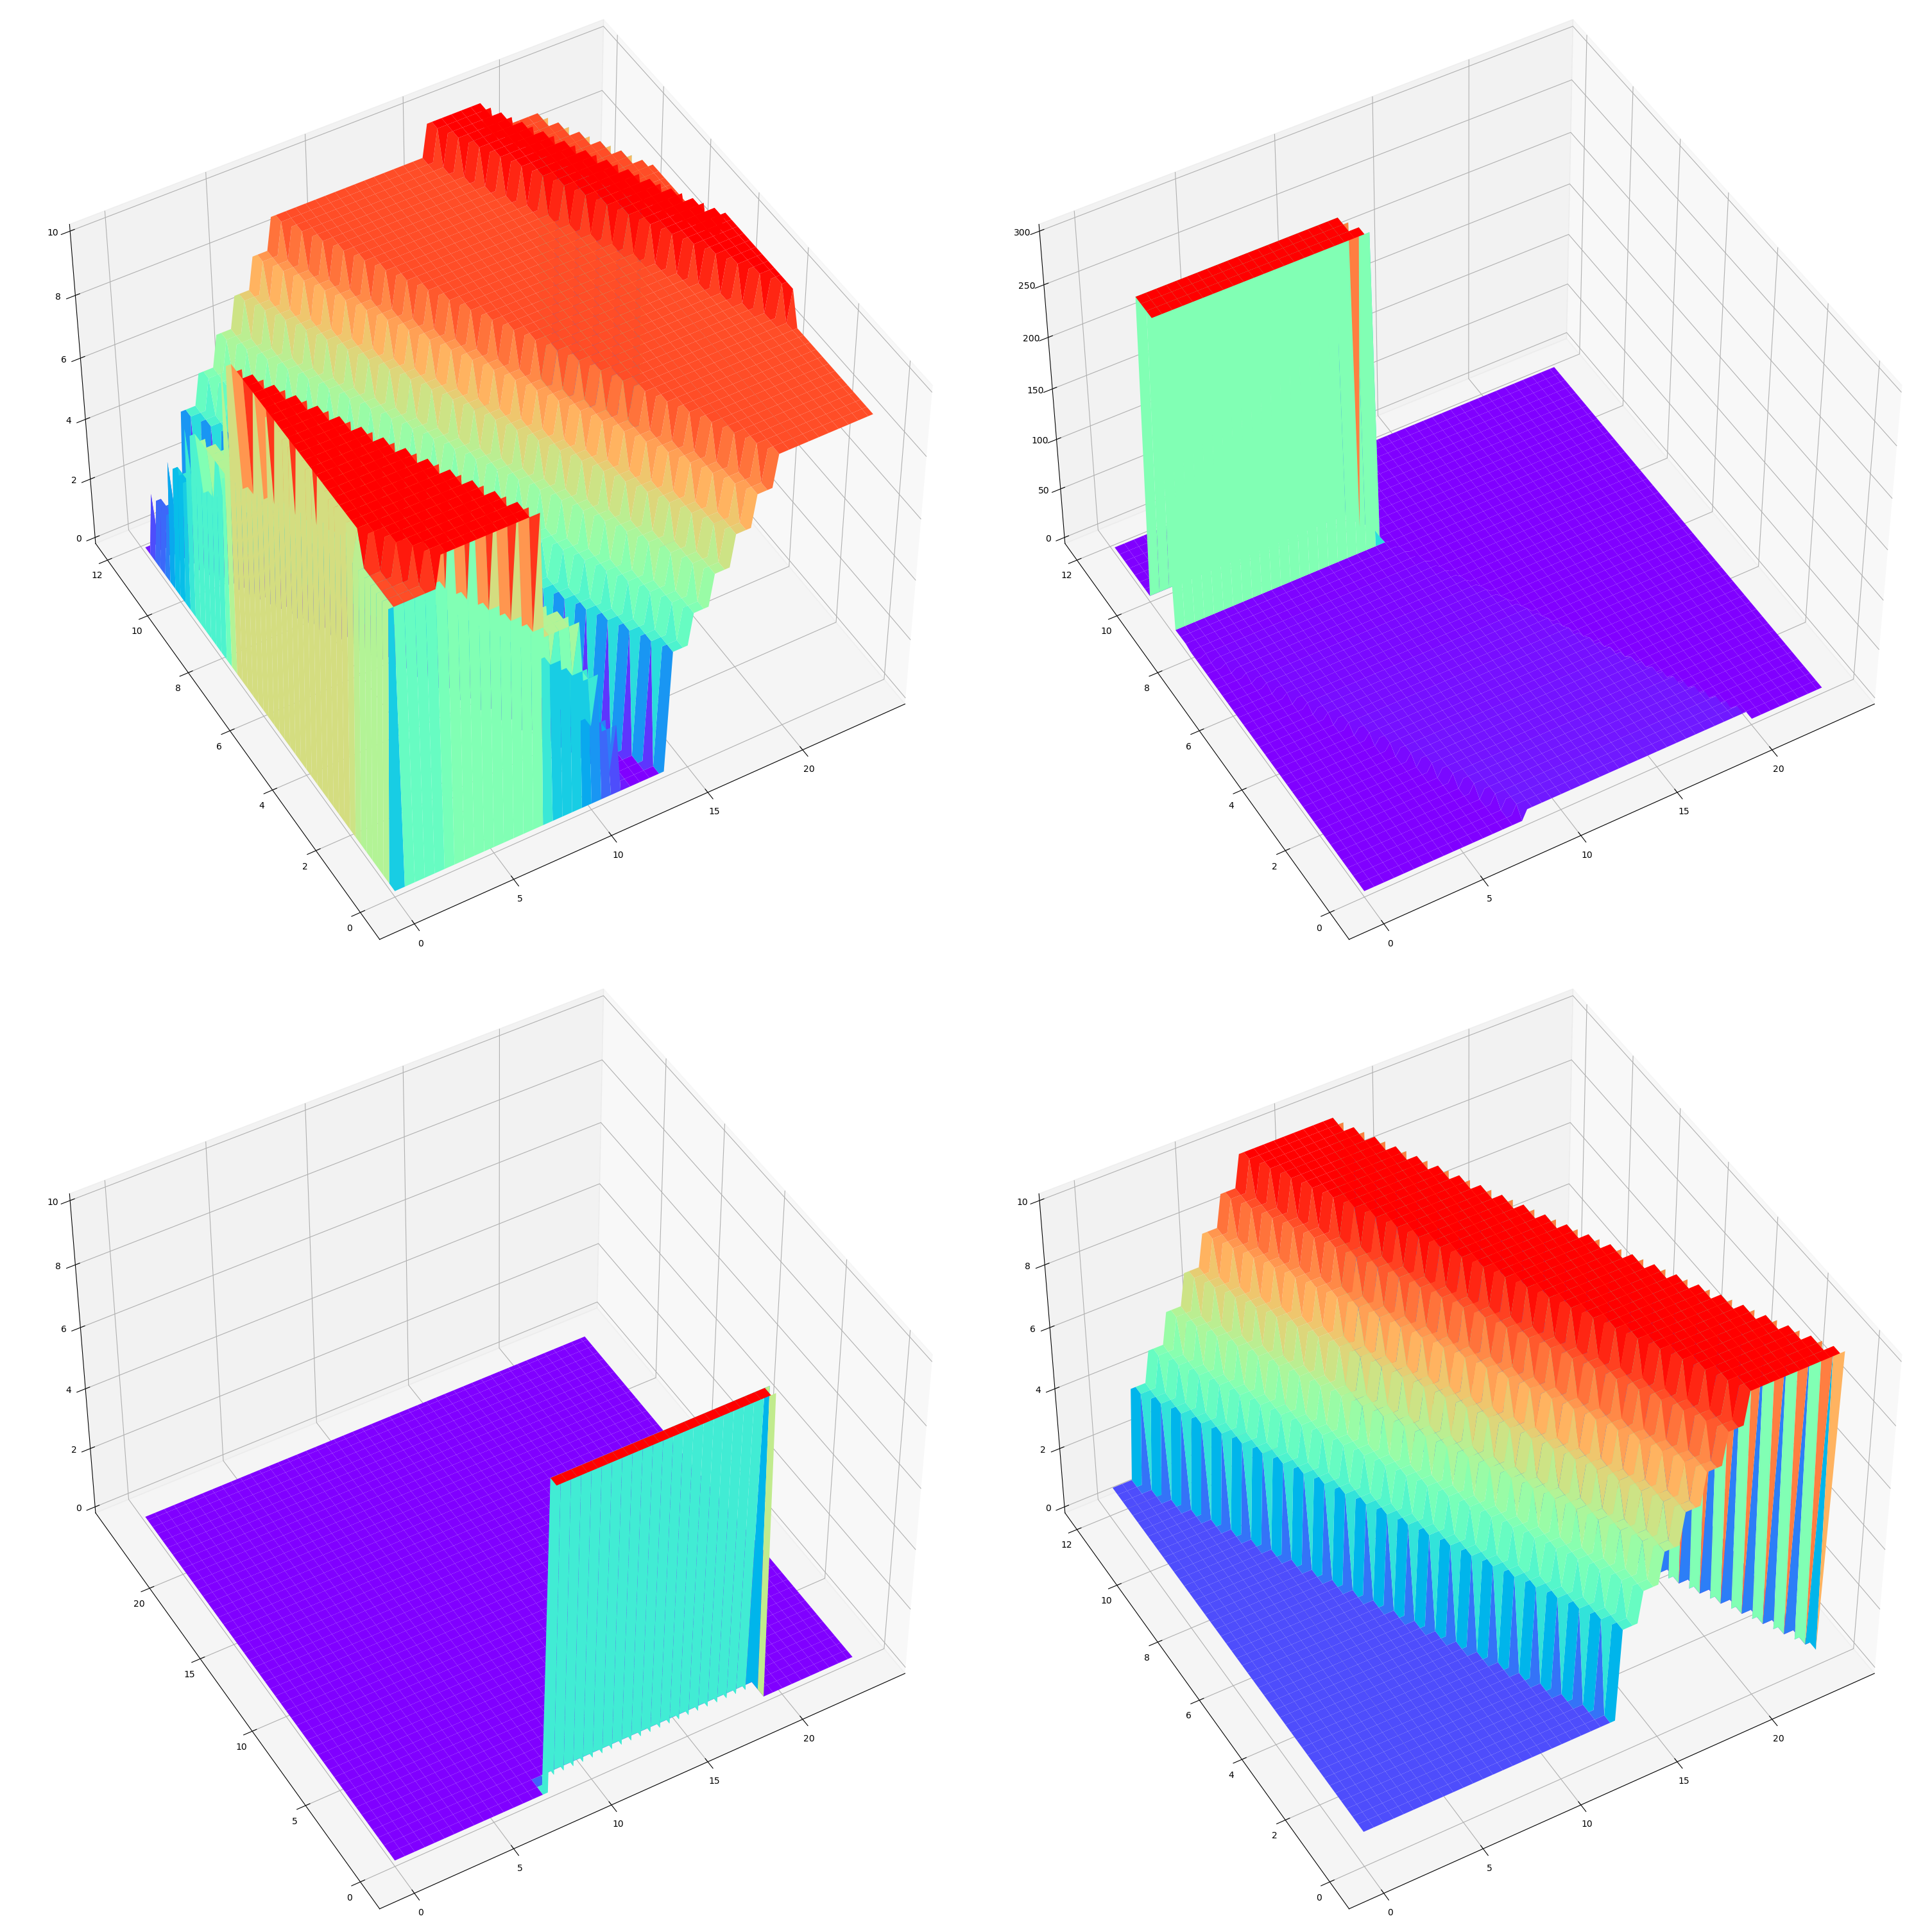

In [4]:


fig = plt.figure(constrained_layout=True, figsize=(30,30),num=1,clear=True)
# gs = GridSpec(10, 10)
# ax1 = fig.add_subplot(gs[:, 0:9])
# ax2 = fig.add_subplot(gs[0:4, 7:])
ax3 =  fig.add_subplot(223, projection='3d')
ax4 =  fig.add_subplot(221, projection='3d')
ax5 =  fig.add_subplot(224, projection='3d')
ax6 =  fig.add_subplot(222, projection='3d')


#定义三维数据
xx = np.arange(0,24,0.25)
yy = np.arange(0,24,0.25)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(xx),len(yy)))
Z[0:turn_time_to_cor(4,0,45),turn_time_to_cor(4,8,0) : turn_time_to_cor(4,19,0)]  =  10
ax3.plot_surface(X,Y,Z,cmap='rainbow')
ax3.view_init(elev=46, azim=-120)
Z_shopping = Z
######################################

#定义三维数据
xx = np.arange(0,24,0.25)
yy = np.arange(0,12,0.25)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(yy),len(xx)))
# Z[0:turn_time_to_cor(4,8,0),0 : turn_time_to_cor(4,8,0)]  =  10

for i in (12,11,10,8):
    poly2 = asPolygon([(0, turn_time_to_cor(4,i,0)),( turn_time_to_cor(4,i,0),0), (0,0)])
    for x in range(len(Z)):
        for y in range(len(Z)):
            if judge_point(poly2,x,y):
                Z[x,y] = 18-i - (i - 8)
#
#
poly2 = asPolygon([(0, turn_time_to_cor(4,3,0)),( turn_time_to_cor(4,2,0),0), (0,0)])
for x in range(len(Z)):
    for y in range(len(Z)):
        if judge_point(poly2,x,y):
            Z[x,y] = 9
max24 = turn_time_to_cor(4,24,0)
max12 = turn_time_to_cor(4,12,0)



for k in range(14,20):
    for i in range(0, 48):
        for j in range(0, 96):
            if i + j >= k * 4:
                Z[i, j] = k - 14 + 4

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 80:
            Z[i, j] = 9

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 108:
            Z[i, j] = 10

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 120:
            Z[i, j] = 9

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 132:
            Z[i, j] = 0

Z_home = Z

ax4.plot_surface(X,Y,Z,cmap='rainbow')
ax4.view_init(elev=46, azim=-120)

#定义三维数据
xx = np.arange(0,24,0.25)
yy = np.arange(0,12,0.25)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(yy),len(xx)))
for i in range(0, 48):
    for j in range(0, 96):
        Z[i, j] = 1



for k in range(13,19):
    for i in range(0, 48):
        for j in range(0, 96):
            if i + j >= k * 4:
                Z[i, j] = k - 9

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 19*4:
            Z[i, j] = 10

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 24*4:
            Z[i, j] = 0
ax5.plot_surface(X,Y,Z,cmap='rainbow')
ax5.view_init(elev=46, azim=-120)

Z_leisure = Z

#定义三维数据
xx = np.arange(0,24,0.25)
yy = np.arange(0,12,0.25)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(yy),len(xx)))

for i in range(0,40):
    for j in range(0, 96):
        Z[i, j] = 10 - 10* i/40

for i in range(36,40):
    for j in range(0,96):
        Z[i, j] = 300

for i in range(0, 48):
    for j in range(0, 96):
        if i + j <= 8*4 or  i + j >= 80:
            Z[i, j] = 0


ax6.plot_surface(X,Y,Z,cmap='rainbow')
ax6.view_init(elev=46, azim=-120)
Z_work = Z

plt.show()


In [5]:
travel_time= [3,1,1,2]

In [6]:


class Env:
    def __init__(self):
        self.reward_leisure = Z_leisure
        self.reward_home = Z_home
        self.reward_shop = Z_shopping
        self.reward_work = Z_work
    def get_reward(self,activity_id,start_time,dur):
        cur_act = {
                    0:self.reward_home,
                    1:self.reward_work,
                    2:self.reward_shop,
                    3:self.reward_leisure
                }
        re_table = cur_act.get(activity_id)
        try:
            res = re_table[dur][start_time]
        except:
            print(dur,start_time)
        return re_table[dur][start_time]

    def step(self,state,action) :
        reward = 0
        activity_no = state[0]
        start_time = state[1]
        dur = state[2]
        if action == 0 :
            #超24小时了
            if start_time + dur + 1>= 96:
                return True, reward , None

            # dur 超过 12 * 4 自动跳转下一个行为
            if dur + 1 >= 48:
                reward -= travel_time[activity_no]
                # 加上旅程超24小时了
                if start_time + dur + travel_time[activity_no] >= 96:
                    return True, reward , None
                # 正常转换
                start_time = start_time + dur + travel_time[activity_no]
                activity_no += 1
                dur = 0
            else:
                dur += 1

            reward += self.get_reward(activity_no,start_time,dur)
        else:
            # travel cost
            reward -= travel_time[activity_no]
            start_time = start_time + dur + travel_time[activity_no]
            # 超24小时了
            if start_time >= 96:
                return True,reward, None
            if state[0] == 3:
                # go home 并且计算剩下的reward
                i = 0
                while start_time + i < 48:
                    reward += self.get_reward(0,start_time,i)
                    i+=1
                return True, reward, None
            else:
                activity_no += 1
                dur = 0
                reward += self.get_reward(activity_no,start_time,dur)
        return False,reward,(activity_no,start_time,dur)


In [7]:
env = Env()
env.step((0,95,33),0)

(True, 0, None)

In [8]:
# 构建state矩阵
# 4 activity , 2 action state_space(activity,start_time,dur)
state = np.zeros((1,3))
action = [0,1]
epsilon = 0.1
alpha = 0.2

def train(env):
    episodes = 10000
    runs = 1
    rewards_q = np.zeros(episodes)
    for r in range(runs):
        print(r)
        q_table_q = np.zeros((4,96,48,2))
        for ep in range(episodes):
            # old_q_table = q_table_q.copy()
            print("--", ep)
            rewards_q[ep] += q_learning(env, q_table_q, 0.2, 0.1)
            # diff = np.sum(np.abs(old_q_table - q_table_q))
            # print("diff = ",diff)
        if r == runs - 1:
            # print(q_table_q)
            return q_table_q

    rewards_q /= runs


def q_learning(env: Env, q_table, alpha, epsilon):
    old_q_table = None
    state = (0,np.random.randint(0,96),np.random.randint(0,48),0)
    # print("init_state : ", state)
    rewards = 0
    while True:

        if np.random.binomial(1, epsilon) == 1:
            action = np.random.choice(2)
        else:
            action = find_action_from_q_table(q_table, state)

        is_finish, reward, next_state = env.step(state, action)
        # print("action = ", action, "next state = ", next_state)
        if is_finish:
            break
        rewards += reward
        next_action = find_action_from_q_table(q_table, next_state)
        # print("old ",state[0],state[1],state[2],[action], "value ",q_table[state[0]][state[1]][state[2]][action], " => ", "re ",reward, "next state",[next_state[0]],[next_state[1]],[state[2]],[next_action]," next value ",q_table[next_state[0]][next_state[1]][state[2]][next_action] )
        q_table[state[0]][state[1]][state[2]][action] += alpha * (reward + q_table[next_state[0]][next_state[1]][state[2]][next_action]
                                                        - q_table[state[0]][state[1]][state[2]][action])
        # print("new ",state[0],state[1],state[2],[action], "value ",q_table[state[0]][state[1]][state[2]][action])
        state = next_state
    # print("reward = ",reward)
    return rewards

def find_action_from_q_table(q_table, state):
    values = q_table[state[0]][state[1]][state[2]]
    return np.random.choice(np.where(values == np.max(values))[0])

In [18]:
qt = train(env)
qt

0
-- 0
-- 1
-- 2
-- 3
-- 4
-- 5
-- 6
-- 7
-- 8
-- 9
-- 10
-- 11
-- 12
-- 13
-- 14
-- 15
-- 16
-- 17
-- 18
-- 19
-- 20
-- 21
-- 22
-- 23
-- 24
-- 25
-- 26
-- 27
-- 28
-- 29
-- 30
-- 31
-- 32
-- 33
-- 34
-- 35
-- 36
-- 37
-- 38
-- 39
-- 40
-- 41
-- 42
-- 43
-- 44
-- 45
-- 46
-- 47
-- 48
-- 49
-- 50
-- 51
-- 52
-- 53
-- 54
-- 55
-- 56
-- 57
-- 58
-- 59
-- 60
-- 61
-- 62
-- 63
-- 64
-- 65
-- 66
-- 67
-- 68
-- 69
-- 70
-- 71
-- 72
-- 73
-- 74
-- 75
-- 76
-- 77
-- 78
-- 79
-- 80
-- 81
-- 82
-- 83
-- 84
-- 85
-- 86
-- 87
-- 88
-- 89
-- 90
-- 91
-- 92
-- 93
-- 94
-- 95
-- 96
-- 97
-- 98
-- 99
-- 100
-- 101
-- 102
-- 103
-- 104
-- 105
-- 106
-- 107
-- 108
-- 109
-- 110
-- 111
-- 112
-- 113
-- 114
-- 115
-- 116
-- 117
-- 118
-- 119
-- 120
-- 121
-- 122
-- 123
-- 124
-- 125
-- 126
-- 127
-- 128
-- 129
-- 130
-- 131
-- 132
-- 133
-- 134
-- 135
-- 136
-- 137
-- 138
-- 139
-- 140
-- 141
-- 142
-- 143
-- 144
-- 145
-- 146
-- 147
-- 148
-- 149
-- 150
-- 151
-- 152
-- 153
-- 154
-- 155
-- 156
-- 157
--

TypeError: 'NoneType' object is not subscriptable

In [ ]:
env.reward_home[95][0]

In [ ]:
qt[0][0][47]

In [ ]:
def print_optimal_policy(q_table):
    optimal_policy = []
    for i in range(0, 96):
        optimal_policy.append([])
        for j in range(0, 48):
            act = np.argmax(q_table[i, j, :])
            if act == 0:
                optimal_policy[-1].append('U')
            elif act == 1:
                optimal_policy[-1].append('D')
            elif act == 2:
                optimal_policy[-1].append('L')
            elif act == 3:
                optimal_policy[-1].append('R')
    for row in optimal_policy:
        print(row)

#定义三维数据
xx = np.arange(0,24,0.25)
yy = np.arange(0,12,0.25)
X, Y = np.meshgrid(48,96)
#作图
Z = np.zeros((96,96))

for i in range(0,96):
    for j in range(0, 48):
        # print(i,j)
        # print(np.argmax(qt[0][i][j]))
        Z[i, j] =  np.argmax(qt[0][i][j])
# fig = plt.figure(constrained_layout=True, figsize=(30,30),num=1,clear=True)
# ax6.plot_surface(X,Y,Z,cmap='rainbow')
# ax6.view_init(elev=46, azim=-120)
# Z_work = Z
#
# plt.show()
Z

In [ ]:
# 1小时

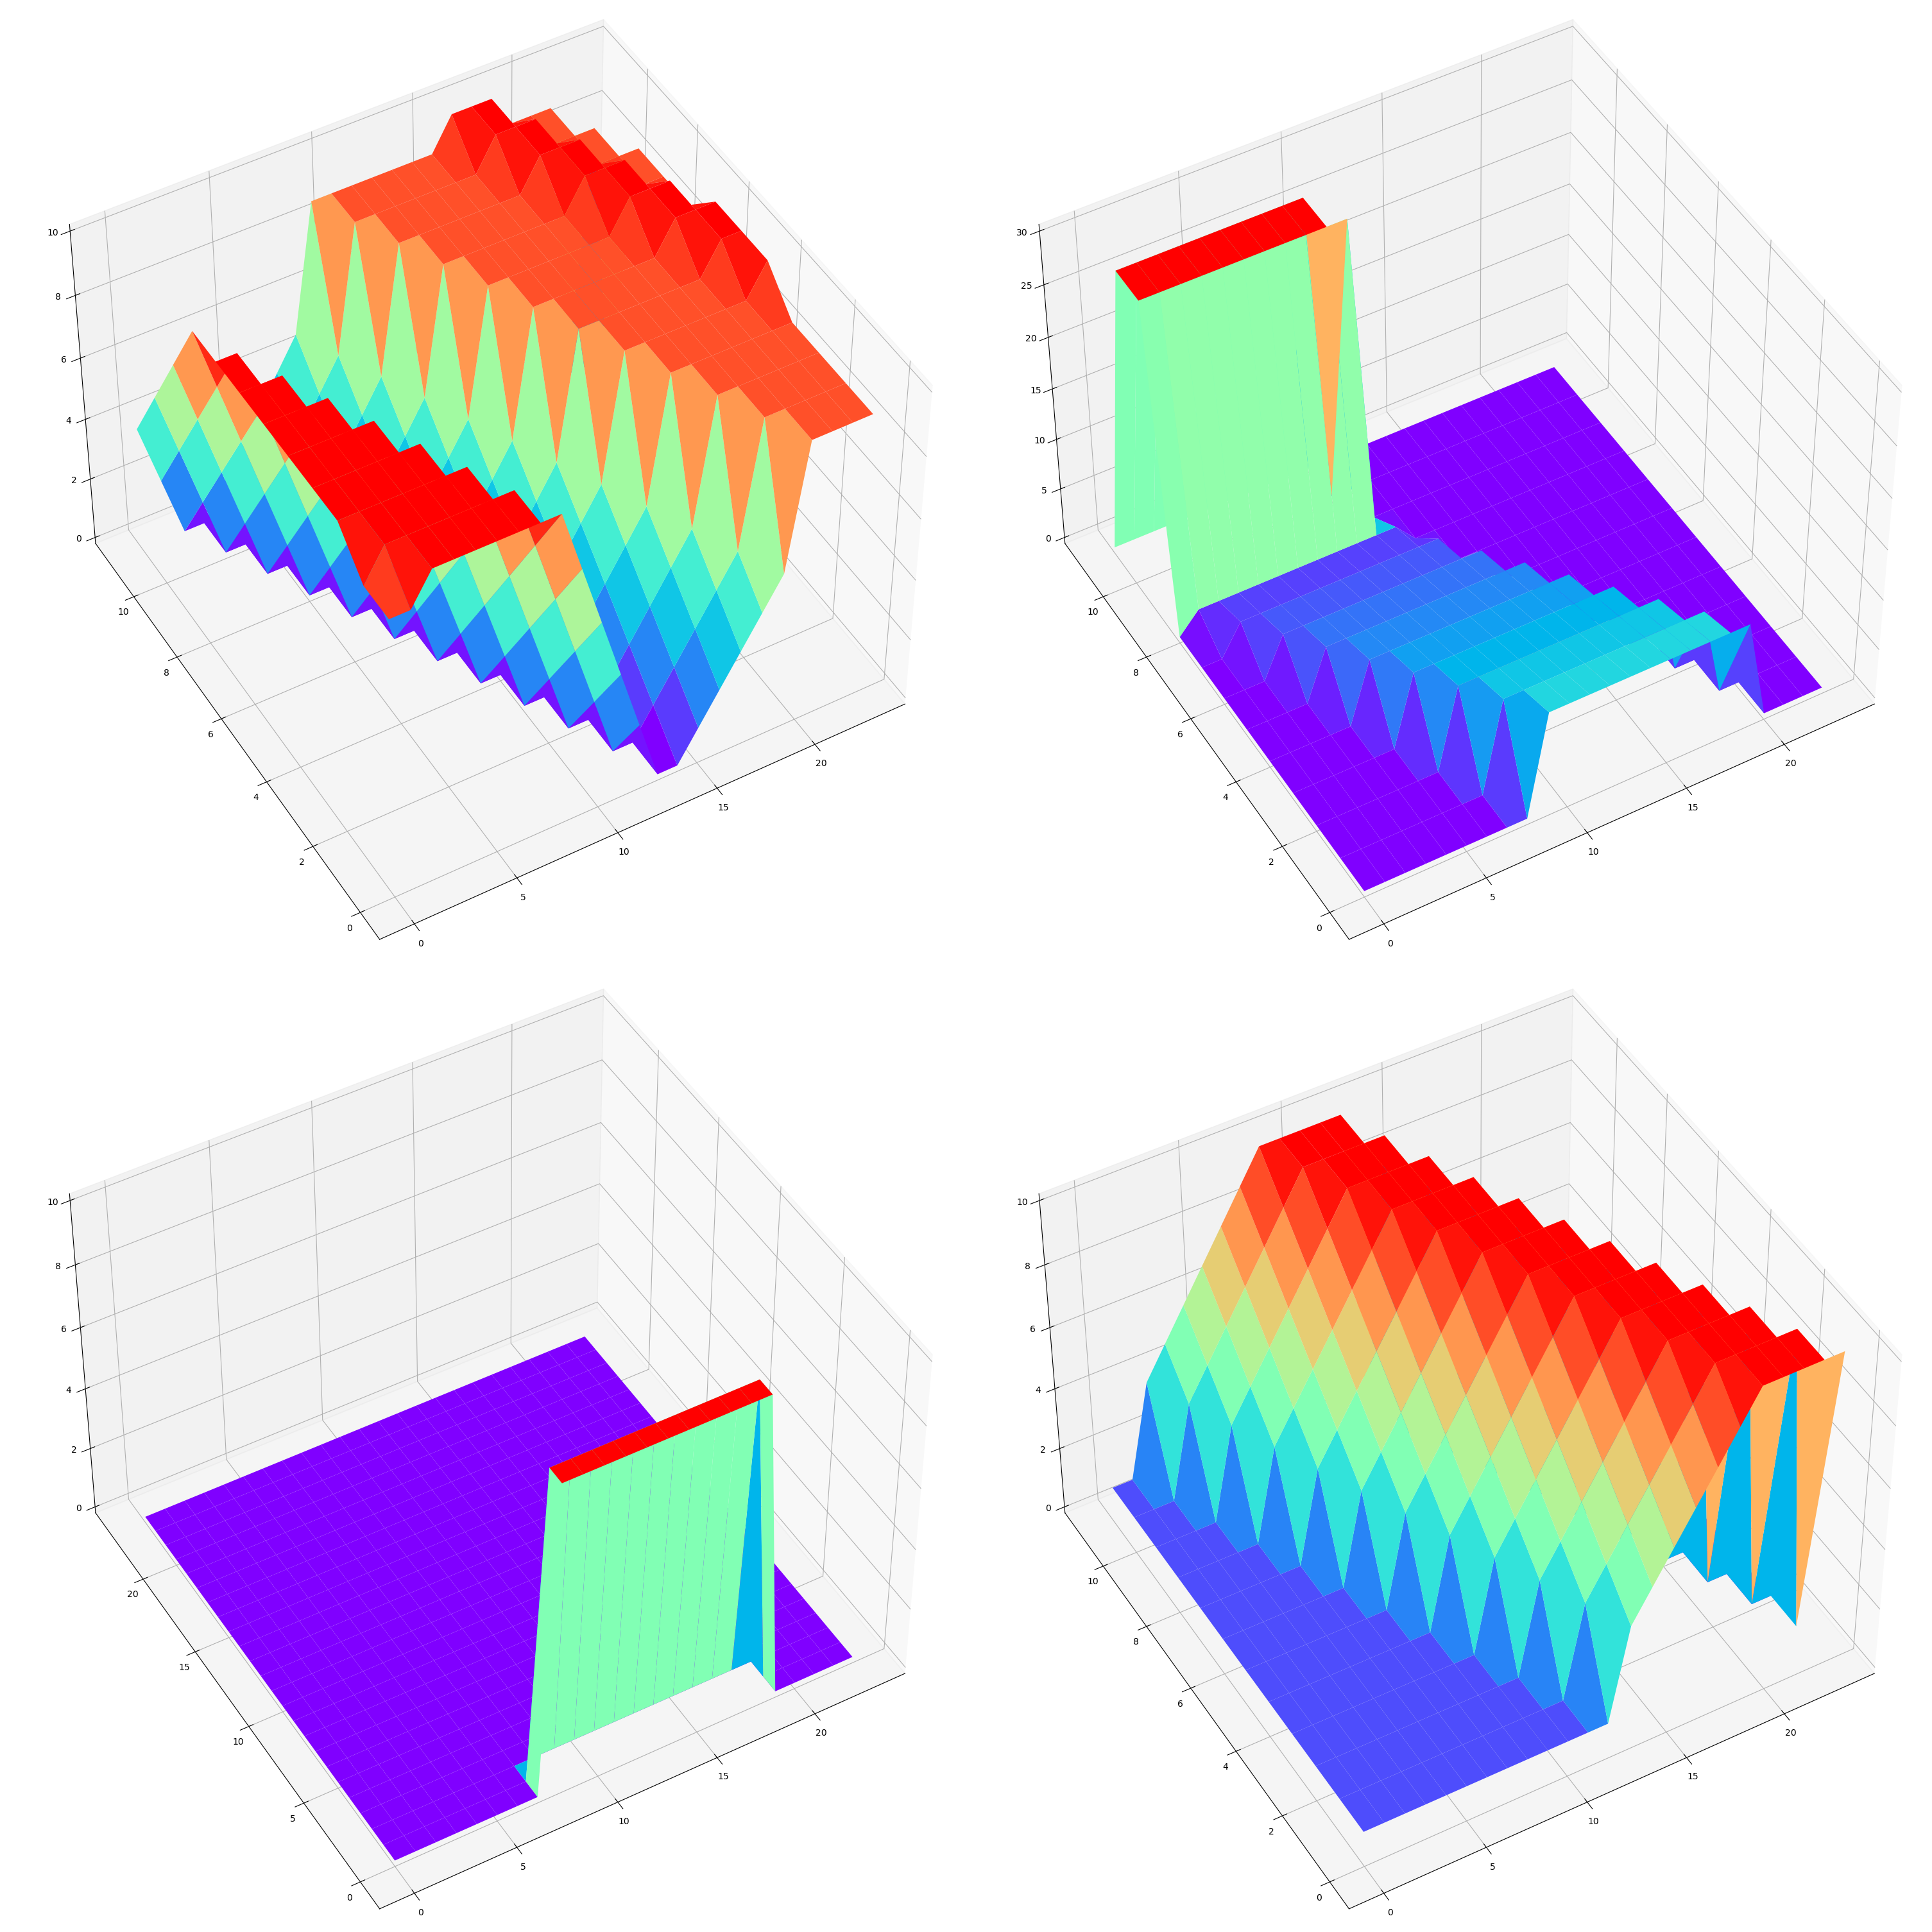

In [129]:
fig = plt.figure(constrained_layout=True, figsize=(30,30),num=1,clear=True)

ax3 =  fig.add_subplot(223, projection='3d')
ax4 =  fig.add_subplot(221, projection='3d')
ax5 =  fig.add_subplot(224, projection='3d')
ax6 =  fig.add_subplot(222, projection='3d')


#定义三维数据
xx = np.arange(0,24)
yy = np.arange(0,24)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(xx),len(yy)))
Z[0:2,8:19]  =  10
ax3.plot_surface(X,Y,Z,cmap='rainbow')
ax3.view_init(elev=46, azim=-120)
Z_shopping = Z
######################################

#定义三维数据
xx = np.arange(0,24)
yy = np.arange(0,12)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(yy),len(xx)))
for k in (20,19,18,17,16,15):
    for i in range(0, 12):
        for j in range(0, 24):
            if i + j == k :
                Z[i, j] = k - 14

for k in (9,10,11,12):
    for i in range(0, 12):
        for j in range(0, 24):
            if i + j == k :
                Z[i, j] = 26 - 2*k


for i in range(0, 12):
    for j in range(0, 24):
        if i + j <= 8:
            Z[i, j] = 10
        if i + j <= 1:
            Z[i, j] = 9
        if i + j >= 20:
            Z[i, j] = 9
        if i + j >= 27:
            Z[i, j] = 10
        if i + j >= 30:
            Z[i, j] = 9
        if i + j >= 33:
            Z[i, j] = 0

Z_home = Z

ax4.plot_surface(X,Y,Z,cmap='rainbow')
ax4.view_init(elev=46, azim=-120)

#定义三维数据
xx = np.arange(0,24)
yy = np.arange(0,12)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(yy),len(xx)))
for i in range(0, 12):
    for j in range(0, 24):
        Z[i, j] = 1

for k in range(13,19):
    for i in range(0, 12):
        for j in range(0, 24):
            if i + j == k:
                Z[i, j] = k - 9

for i in range(0, 12):
    for j in range(0, 24):
        if i + j >= 19:
            Z[i, j] = 10
        if i + j >= 24:
            Z[i, j] = 0
ax5.plot_surface(X,Y,Z,cmap='rainbow')
ax5.view_init(elev=46, azim=-120)

Z_leisure = Z

#定义三维数据
xx = np.arange(0,24)
yy = np.arange(0,12)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(yy),len(xx)))

for i in range(0,10):
    for j in range(0, 24):
        Z[i, j] = 10 - 10* i/10

for i in range(9,11):
    for j in range(0,24):
        Z[i, j] = 30

for i in range(0, 12):
    for j in range(0, 24):
        if i + j <= 8 or  i + j >= 20:
            Z[i, j] = 0


ax6.plot_surface(X,Y,Z,cmap='rainbow')
ax6.view_init(elev=46, azim=-120)
Z_work = Z

plt.show()


In [130]:
class Env:
    def __init__(self):
        self.reward_leisure = Z_leisure
        self.reward_home = Z_home
        self.reward_shop = Z_shopping
        self.reward_work = Z_work
    def get_reward(self,activity_id,start_time,dur):
        cur_act = {
                    0:self.reward_home,
                    1:self.reward_work,
                    2:self.reward_shop,
                    3:self.reward_leisure,
                    4:self.reward_home,
                }
        re_table = cur_act.get(activity_id)
        try:
            res = re_table[dur][start_time]
        except:
            print(dur,start_time)
            print(re_table)
            print(activity_id)
        return re_table[dur][start_time]

    def step(self,state,action) :
        reward = 0
        activity_no = 0 if state[0]  == 4 else state[0]
        start_time = state[1]
        dur = state[2]
        if action == 0 :
            #超24小时了
            if start_time + dur + 1>= 24:
                return True, reward , None

            # dur 超过 12 * 4 自动跳转下一个行为
            if dur + 1 >= 12:
                reward -= travel_time[activity_no]
                # 加上旅程超24小时了
                if start_time + dur + travel_time[activity_no] >= 24:
                    return True, reward , None
                # 正常转换
                start_time = start_time + dur + travel_time[activity_no]
                activity_no += 1
                dur = 0
            else:
                dur += 1

            reward += self.get_reward(activity_no,start_time,dur)
        else:
            # travel cost
            reward -= travel_time[activity_no]
            start_time = start_time + dur + travel_time[activity_no]
            # 超24小时了
            if start_time >= 24:
                return True,reward, None
            if state[0] == 3:
                # go home 并且计算剩下的reward
                i = 0
                while start_time + i < 12:
                    reward += self.get_reward(0,start_time,i)
                    i+=1
                return True, reward, None
            else:
                activity_no += 1
                if activity_no == 4:
                    activity_no = 0
                dur = 0
                reward += self.get_reward(activity_no,start_time,dur)
        return False,reward,(activity_no,start_time,dur)


In [143]:
env = Env()
travel_time= [1,1,1,1]
# 构建state矩阵
# 4 activity , 2 action state_space(activity,start_time,dur)
state = np.zeros((1,3))
action = [0,1]
epsilon = 0.1
alpha = 0.2

def train(env):
    episodes = 10
    runs = 1
    rewards_q = np.zeros(episodes)
    test_score = []
    for r in range(runs):
        print(r)
        q_table_q = np.zeros((4,24,12,2))

        for ep in range(episodes):
            # old_q_table = q_table_q.copy()
            print("--", ep)
            rewards_q[ep] += q_learning(env, q_table_q, 0.2, 0.1)
            # diff = np.sum(np.abs(old_q_table - q_table_q))
            # print("diff = ",diff)
            test_score.append(test(q_table_q,env))
        if r == runs - 1:
            # print(q_table_q)
            plt.plot(test_score)
            return q_table_q

def test(q_table, env):
    s = (0,0,0)
    score = 0
    while True:
        a = 0 if s[0] == 4 else 0
        best_act = np.argmax(q_table[a][s[1]][s[2]])
        is_finish, reward, new_s =  env.step(s,best_act)
        score += reward
        if is_finish:
            break
        s = new_s
    return score

def q_learning(env: Env, q_table, alpha, epsilon):
    old_q_table = None
    state = (0,np.random.randint(0,24),np.random.randint(0,12))
    # print("init_state : ", state)
    while True:

        # if np.random.binomial(1, epsilon) == 1:
        #     action = np.random.choice(2)
        # else:
        action = find_action_from_q_table(q_table, state)

        is_finish, reward, next_state = env.step(state, action)
        # print("action = ", action, "next state = ", next_state)
        print("rw = ",reward)
        if is_finish:
            break
        # print("old ",state[0],state[1],state[2],[action], "value ",q_table[state[0]][state[1]][state[2]][action], " => ", "re ",reward, "next state",[next_state[0]],[next_state[1]],[state[2]],[next_action]," next value ",q_table[next_state[0]][next_state[1]][state[2]][next_action] )
        act = 0 if state[0] == 4 else state[0]
        next_activity =  0 if next_state[0] == 4 else next_state[0]
        q_table[act][state[1]][state[2]][action] += alpha * (reward + np.max(q_table[next_activity,next_state[1],state[2],:])
                                                        - q_table[act][state[1]][state[2]][action])
        # print("new ",state[0],state[1],state[2],[action], "value ",q_table[state[0]][state[1]][state[2]][action])
        state = next_state
    return reward

def find_action_from_q_table(q_table, state):
    activity = 0 if state[0] == 4 else state[0]
    values = q_table[activity][state[1]][state[2]]
    return np.random.choice(np.where(values == np.max(values))[0])

0
-- 0
rw =  9.0
rw =  9.0
rw =  10.0
rw =  8.0
rw =  -1
-- 1
rw =  -1.0
rw =  0
-- 2
rw =  10.0
rw =  10.0
rw =  -1.0
rw =  9.0
rw =  10.0
rw =  0.0
rw =  0.0
rw =  0.0
rw =  0.0
rw =  0.0
rw =  5.0
rw =  -1
-- 3
rw =  -1.0
rw =  -1
-- 4
rw =  9.0
rw =  -1.0
rw =  0.0
rw =  0.0
rw =  9.0
rw =  0
-- 5
rw =  0
-- 6
rw =  -1
-- 7
rw =  0
-- 8
rw =  9.0
rw =  0.0
rw =  0.0
rw =  0.0
rw =  0.0
rw =  -1
-- 9
rw =  0


array([[[[ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         ...,
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ]],

        [[ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         ...,
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ]],

        [[ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         ...,
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ]],

        ...,

        [[ 0. ,  0. ],
         [ 0. , -0.2],
         [ 0. ,  0. ],
         ...,
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ]],

        [[ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         ...,
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ]],

        [[ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         ...,
         [ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. ,  0. ]]],


       [[[ 0. ,  0. ],
         [ 0. ,  0. ],
         [ 0. 

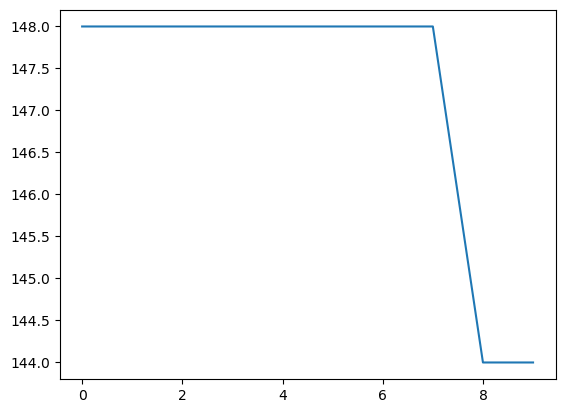

In [144]:
qt = train(env)
qt

In [22]:
env.get_reward(0,0,23)

23 0


IndexError: index 23 is out of bounds for axis 0 with size 12

In [139]:
Z = np.zeros((4,24,12))
for a in range(4):
    for i in range(0,24):
        for j in range(0, 12):
            # print(i,j)
            # print(np.argmax(qt[0][i][j]))
            Z[a,i, j] =  np.argmax(qt[a][i][j])
Z

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
       [1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.,

In [141]:
qt[0][1][7]

array([0., 9.])